Problems from:

An Introduction to Mechanics
by Dr. Daniel Kleppner and Dr. Robert Kolenkow

In [1]:
%matplotlib 
import matplotlib.pyplot as plt
from scipy import *
from scipy.optimize import minimize
import numpy as np
from IPython.display import Image
from scipy.integrate import odeint, ode

Using matplotlib backend: MacOSX


In [7]:
# 6.4 bouncing ball
h = 1.28 # initial height [m]
g = 9.81 # gravity [m/s^2]
e = 0.75 # coefficient of restitution

In [8]:
# find v0
t0 = np.sqrt(2*h/g)
v0 = g*t0
print(v0)

5.011347124277064


In [9]:
# find y
ve = v0
t_total = t0
t = np.linspace(0,t0,50)
y = h - g/2*t**2
v = -g*t
y_temp = y
n_bounce = 0
while max(y_temp) > 1e-5:
    print(f'Max height: {max(y_temp)}')
    ve = ve*e
    t_next = 2*ve/g
    
    t_temp = np.linspace(0,t_next,50)
    y_temp = -g/2*t_temp**2 + ve*t_temp
    v_temp = -g*t_temp + ve
    
    t = np.append(t, t_temp + t_total)
    y = np.append(y, y_temp)
    v = np.append(v, v_temp)
    
    t_total = t_total + t_next
    n_bounce += 1

Max height: 1.28
Max height: 0.7197001249479383
Max height: 0.40483132028321533
Max height: 0.22771761765930865
Max height: 0.12809115993336112
Max height: 0.07205127746251562
Max height: 0.04052884357266503
Max height: 0.022797474509624088
Max height: 0.012823579411663549
Max height: 0.007213263419060746
Max height: 0.00405746067322167
Max height: 0.002282321628687189
Max height: 0.0012838059161365436
Max height: 0.0007221408278268058
Max height: 0.0004062042156525782
Max height: 0.0002284898713045753
Max height: 0.0001285255526088236
Max height: 7.22956233424633e-05
Max height: 4.066628813013561e-05
Max height: 2.287478707320128e-05
Max height: 1.2867067728675716e-05


Text(0.5, 1.0, 'Total Bounces:21')

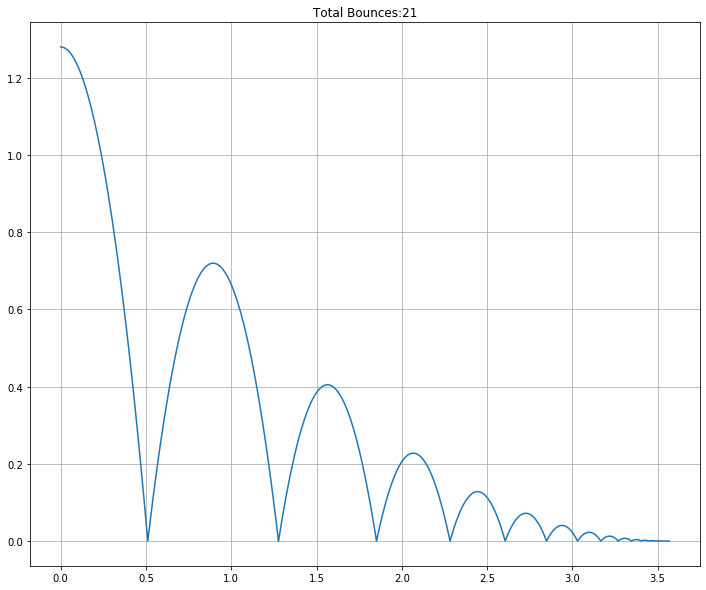

In [10]:
plt.figure(figsize=(12,10))
plt.plot(t,y)
plt.grid()
plt.title(f'Total Bounces:{n_bounce}')

In [ ]:
# time from first bounce until rest (which is what the question asks for)
print(f'time from first bounce until ball at rest: {max(t) - t0}s')